## Lecture 1B
### A quick refreshment on Python

We expect those taking IN1910 to have some Python experience, but you might not have used it that recently. This notebook is meant as a quick refresher on some Python syntax. We will show some simple examples to get the ball rolling, and you can use the first set of exercises to try your hand and writing some code yourself.

If you don't know any Python going into IN1910, you should be able to pick it up along the way, but you will have to expect to devot more time to working with the material. In this case, please ask the lecturer or your TA for helpful advice on how to better learn Python.

If this refresh is not sufficient for your needs, *A Primer on Scientific Programming with Python* by Langtangen is a good resource to use.

#### A short note on Jupyter Notebook

This document, and most of the others in IN1910, are written in Jupyter notebooks. This is a tool that allows for combining traditional text with code that is executable. Previously known as IPython notebooks, the name was changed to reflect that it works with many different languages. Jupyter notebooks has grown into a popular tool for scientific programming, both for teaching and working. 

You are not required to become proficient at using or writing notebooks in this course, and you are free to simply read the documents, and do all your own coding in your preferred text editor. However, Jupyter is a nice tool to know, so also feel free to use it to solve exercises and play around with code and concepts.

In notebooks, everything consists of cells, which are either markdown (text, math, html, etc) or code. In the markdown cells you can render mathematics with LaTeX syntax, and you can include markdown tables, lists, and use html to include images. In the code cells you can write code, and then execute the cell to see the output. You can do this either by clicking the `Run` command in the toolbar on the top, or use the more efficient shortcut `Ctrl+Enter` or `Shift+Enter`. When you run a code, the output will appear below the cell. If you make a change to a cell that has already been run you can rerun the cell, and the new output will replace the old one.

One element that might be confusing to those that have not used notebooks before, is that the notebook is one interactive session, and so variables are remembered after running a cell. However, when loading up a notebook for the first time, everything is forgotten, and you will need to run the cells in order again for everything to work properly. Here a helpful tip is to use the `Kernel` > `Restart and Run All` functionality in the toolbar, which will run the whole notebook in order and load everything into memory.

### Variables and Types


In Python, as in most languages, we use `=` for assigning variables. We do not need to declare the type of the variables, this is implicit and decided by context

In [1]:
t = 0.5
v0 = 2
a = 0.2
s = v0*t + 0.5*a*t**2

Here we first assign the three variables `t`, `v0` and `a`. Then we assign the variable `s` based on our other variables by doing some arithmetic. An assignment on the form of the final line is interpreted as follows:
* Evaluate the right-hand side of the `=` symbol, this results in an *object*
* The left hand side is a name for that object
In this case, the result of the computation is a number, and `s` becomes a name for that number. But how do we check what `s` is? We use the `print`-statement.

In [2]:
print(s)

1.025


Note that `s` is a name pointing at a number object containing 1.025. If we now for example reassign `t`, `s` will _not_ change.

To have more control over how we print, we use print formatting. You can see this link for a [comprehensive introduction](https://docs.python.org/3/tutorial/inputoutput.html). But for now we just give an example:

In [3]:
print("After {:.2f} seconds, the object has traveled {:.3f} meters".format(t, s))

After 0.50 seconds, the object has traveled 1.025 meters


Here we define a text string to be written out by using `"`, inside the text string we define replacement fields by writing `{}` and then we use `.format` to fill these in with given values. Inside the replacement fields we write `:.2f` and `:.3f` to write precisely 2 and 3 decimals respectively. (The `f` stands for *float*)

Note that if print out the distance with two decimals, we get a bit of a surprising result:

In [4]:
print("{:.2f}".format(s))

1.02


1.025 is rounded to 1.02 and not to 1.03! This is because we are running Python3, which uses something called [*bankers' rounding*](https://en.wikipedia.org/wiki/Rounding), in which a .5 is rounded down if the preceeding number is even, and up if it is odd.

In [5]:
print(round(0.5))
print(round(1.5))
print(round(2.5))
print(round(3.5))

0
2
2
4


#### Importing 

Python includes a large number of standard libraries and external packages. In IN1910 we will for example make use of the SciPy stack, which includes packages like numpy, scipy, matplotlib, etc. We can import packages in several ways

In [6]:
from math import *
import scipy
import numpy as np
from scipy.integrate import solve_ivp

1. These are different examples of importing. The first line uses a *wildcard*-import to import everything in math. Note that while this is OK for a quick example, it is considered bad practice and should be avoided. 
2. The second statement imports scipy as a package, so now we can use it by writing for example: `scipy.e` The preference for doing this over a wildcard-import is that it keeps the scipy namespace, meaning we (1) don't overwrite anything by accident, and (2) anywhere we use anything from scipy, it will be very apparent from the code.
3. The third import is very similar to the second, but we just rename the namespace from numpy to np. This is very common and is just to save some typing later on, as we often use numpy functions quite a lot in our programs. Note that "np" is a convention, and you should use exactly that, and not something else. Same for matplotlib.pyplot, which is often shortened to "plt".
4. The fourth import imports a single function from a package. If you know ahead of time you will only use this single feature from the package. It's a nice way to make that apparent to the user.

Import statements should always appear at the top of modules. Modules are what we call seperate python-files.

#### Exercise 1: Your turn

First define the radius of a football as the variable `R`, then compute the volume of the football as the variable `V`, then finally print out the volume with a single decimal. (Hint: You need to either define `pi`, or import it by writing `from math import pi`.)

In [7]:
#Fill in your code here

### Variable Types

In our assignment earlier, we defined four variables, all numbers. However, their datatypes are slightly different. The variables `t`, `a` and `s` were assigned decimal numbers, and therefore became `float` objects, while `v0` is set to an integer number, and became an `integer` object. You can check the type of a variables with the `type` command

In [8]:
print(type(t))
print(type(v0))
print(type(a))
print(type(s))

<class 'float'>
<class 'int'>
<class 'float'>
<class 'float'>


There are plenty of built-in types in Python 3. Some of the common ones are
* Boolean `bool`
* Integer `int`
* Floating point `float`
* Complex floating point `complex`
* String `str`
* List `list`
* Tuple `tuple`
* Range-object `range`
* Dictionary `dict`
* Set `set`
* Immutable set `frozenset`

There are plenty of others, especially if we include the standard libraries, but not all are equally important.

#### Mutable vs Immutable

Note that some of these types are *mutable*, while some are *immutable*. Variables of mutable types can change, variables of immutable types cannot. 

Some examples:
* Immutable: `bool`, `int`, `float`, `str`
* Mutable: `list`, `dict`, `set`

Take the following two examples

In [9]:
a = 5
b = a
a += 5
print(b)

5


In [10]:
a = [5]
b = a
a.append(10)
print(b)

[5, 10]


These two example show fundamentaly different behavior. In both cases we make a "copy" of the first variable, by assigning `a = b`. We then change `a`, and print out `b`. We might expect that `b` should be unchanged, since we only change `a`. In the first example, this is indeed the case, we see that `b` is still 5. In the second example however, the list `b` is changed! What is going on?

To understand this, we need to recall how Python objects work. When we are assigning `b = a`, we are not actually making any new objects, we are simply making a new name, and pointing it as the same object as the name `a` is pointing too. So when we change `a`, we are really changing the underlying list, and so `b` is pointing to the same list object and so is changed. There is ever only a single list object that exists!

This is because the list is mutable (changable). When we do the same for the integers, and integer is imutable, so when we say `a += 5`, we are not really changing the underlying integer object in memory, but creating a new one. Python has to do this, because the integer object is immutable and so cannot change. In this case, there will therefore be two integer objects in existence, and `a` points to one of them, `b` to the other.

#### PythonTutor

Often in programming, we will be confused by examples such as the previous ones. In these cases it can be good to draw an example of what is going on behind the scenes in the program. A helpful tool here is the online Python tutor:
[http://pythontutor.com](http://pythontutor.com/visualize.html#mode=edit)

This tools lets you write Python code and execute it line by line. For each statement executed, it shows what objects and variables exist, and in which scopes. This can be super helpful for understanding confusing examples such as mutable variables.

# Functions

We define functions using the `def` keyword, they can have any number of arugments and keyword-arguments. Keyword arguments are optional arguments that have a default value. We use the `return` keyword to return something.

In [11]:
import numpy as np

def roll_dice(n=1):
    return sum(np.random.randint(1, 7, n))

print(roll_dice())
print(roll_dice(2))
print(roll_dice(n=4))

2
9
16


This functions rolls $n$ dice and returns the sum of the results. As we defined the argument as a keyword-argument, it defaults to 1 die if we do not specify anything. We can specify the number either by just giving it  as an argument, or by specifying the keyword.

## For Loops

In Python, For-loops have the following syntax
```Python
for <element> in <iterable>:
    <code block to be repeated for each element>
    <code block to be repeated for each element>
    <code block to be repeated for each element>
```

Here, we can name the element whatever we want, for counters it is normal to use `i`, `j`, and `k`. We can loop over any iterable object in Python, for example sequences such as lists and tuples. If you want to loop over a range of numbers, you can use the built-in range function:
```
for i in range(10):
```
Note that in Python3, the range is different from in Python2, in that it is a iterable `range`-object, and not a list, which gives it much better memory performance. If you want a list of integers, simply cast the `range`-object to a list: `list(range(10))`

Two helpful commands to be used in lists are `continue`, which skips to the next iteration of the loop, and `break`, which breaks the remaining iterations.

Example: Using a for-loop to check whether a number is a prime

In [12]:
def is_prime(n):
    if n == 1:
        return False
    
    for i in range(2, n):
        if n % i == 0:
            return False
        
    return True

This function works because as soon as a number is returned, the function ends. So we first check for 1, because it is a bit special. Then we simply do *trial* divisions with each number in the range $[2, n)$. As the definition of a prime is an number that is only divisible by 1 or itself, if we find a divisor, we know the number cannot be a prime and return False. If the whole loop executes, we have not found a divisor, and the number is a prime. We check if the number is divisible by using modulo (

In [13]:
for i in range(1, 12):
    if is_prime(i):
        print("{:2} is prime".format(i))
    else:
        print("{:2} is not prime".format(i))

 1 is not prime
 2 is prime
 3 is prime
 4 is not prime
 5 is prime
 6 is not prime
 7 is prime
 8 is not prime
 9 is not prime
10 is not prime
11 is prime


We can also use *list* comprehensions to quickly compile lists on single-lines using a for-loop syntax. Take the following example:

In [14]:
primes = []
for i in range(1, 13):
    if is_prime(i):
        primes.append(i)

This can also be done with the List-comprehension

In [15]:
primes = [i for i in range(1, 13) if is_prime(i)]

Note that list-comprehensions are quite a lot faster than using a loop, and are considered very useful. Don't hestiate to use list comprehensions were applicable (and similarily dictionary comprehensions). We can now also find the non-primes:


In [16]:
nonprimes = [i for i in range(1, 13) if i not in primes]

In [17]:
print(primes)
print(nonprimes)

[2, 3, 5, 7, 11]
[1, 4, 6, 8, 9, 10, 12]


## While Loop

While loops repeat a block of code as long as some condition is true. The syntax of a while loop in Python is as follows:
```Python
while <condition>:
    <code block to be repeated>
    <code block to be repeated>
    <code block to be repeated>
```
The condition has to be some statement that can be evaluated to either True or False.

Assume we have a savings account with an annual interest of 3.5%. If we deposit $10000 to the account at the start of year 0. How many years would you need to wait before the money in the account has doubled?

In [18]:
years = 0
interest = 1.035
money = 10000

while money < 20000:
    money *= interest
    years += 1
    
print("You will need to wait {} years, you'll have ${:.0f} in your account".format(years, money))

You will need to wait 21 years, you'll have $20594 in your account


## Plotting

Plotting is a useful tool in Pyhton. Many packages exist for plotting, but the most popular one, and the one we will use in IN1910, is *matplotlib*, which is also part of the scipy stack. Matplotlib is easy to learn, but can become a bit messy to use if you want to control every fine detail of the figure. If you know matplotlib properly, you can make gorgeous figures for projects, publications and reports. For this it is helpful to see the [matplotlib website](https://matplotlib.org/gallery/index.html) which is full of examples and tutorials.

For now, we simply cover simple plotting of functions. It is common to import `matplotlib.pyplot` as `plt`.

In [19]:
import matplotlib.pyplot as plt

The `plt.plot` command takes a list of values on the $x$-axis and a list of values on the $y$-axis, and draws a line through them. As an example we use `np.linspace` and `np.sin` to define a sine-curve:

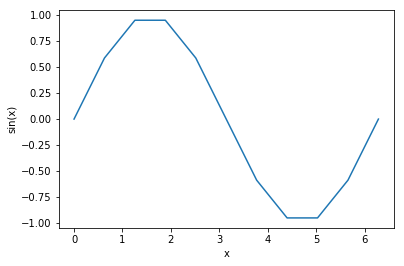

In [20]:
x = np.linspace(0, 2*pi, 11)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

The curve is choppy because we have such few points, which is more obvious if we redefine the linestyle:

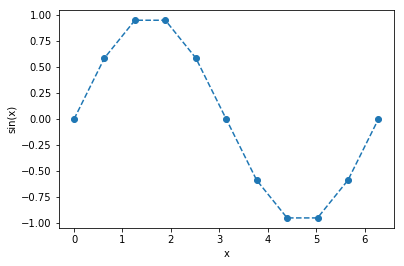

In [21]:
plt.plot(x, y, 'o--')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

To get a smoother curve, we need to add more points, this is as easy as adding more points to the `linspace` argument:

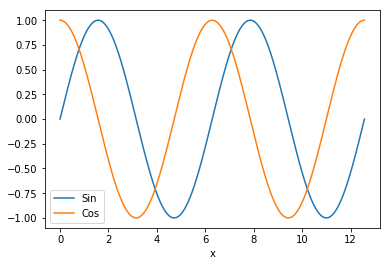

In [22]:
x = np.linspace(0, 4*pi, 1001)

plt.plot(x, np.sin(x), label='Sin')
plt.plot(x, np.cos(x), label='Cos')
plt.xlabel('x')
plt.legend()
plt.show()

Plotting mathematical functions is very fast with numpy and matplotlib, and is a useful tool for exploring behavior. Let us for example plot a dampned sine wave: $g(y) = e^{-y}\sin(8y)$ for $y\in[0, 4]$.

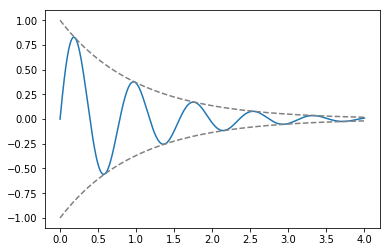

In [23]:
y = np.linspace(0, 4, 1001)
g = np.exp(-y)*np.sin(8*y) 

plt.plot(y, g)
plt.plot(y, np.exp(-y), '--', color='gray')
plt.plot(y, -np.exp(-y), '--', color='gray')
plt.show()

## Solving ODE's with Finite Differences

Recall also that we can solve integrals and differential equations numerically. We only show a very simple example here, but you can read more about it in Langtangen.

If we have a simple ODE, like an exponential decay:
$$\frac{{\rm d}u}{{\rm d}t} = -au(t),$$
For a given time, $t_i$, we can approximate the derivative using the Forward Euler scheme, which gives us the differential equation
$$\frac{u_{i+1} - u_{i}}{\Delta t} = -au_i.$$
where $u_{i} = u(t_i)$ and $t_i = i\Delta t$. And so we can turn our equation into
$$u_{i+1} = (1 - a\Delta t)u_{i}.$$

We can then solve the equation using a for-loop. Altough we need some initial conditions and parameters, let us use $u_0 = 4$ and $a=0.5$. We use a time step of $\Delta t = 10^{-3}$ and solve for $t \in (0, 10)$.

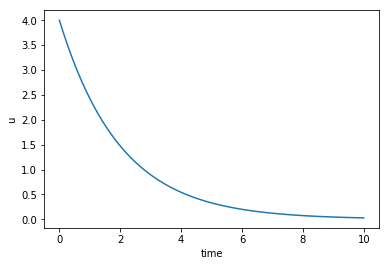

In [24]:
a = 0.5
u0 = 4
dt = 0.001
T = 10

t = np.arange(0, T, dt)
u = np.zeros(len(t))
u[0] = 4

for i in range(len(u)-1):
    u[i+1] = (1 - a*dt)*u[i] 
    
plt.plot(t, u)
plt.xlabel('time')
plt.ylabel('u')
plt.show()